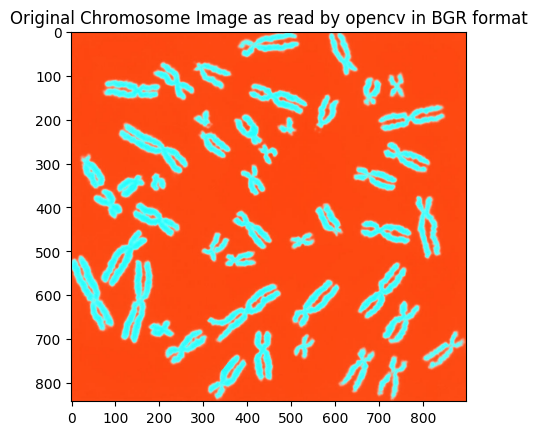

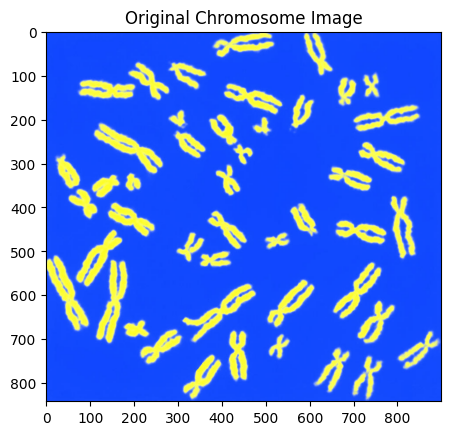

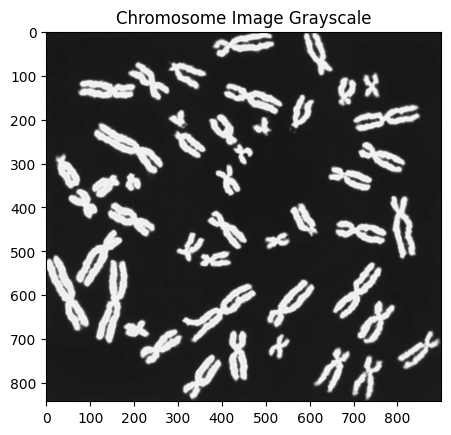

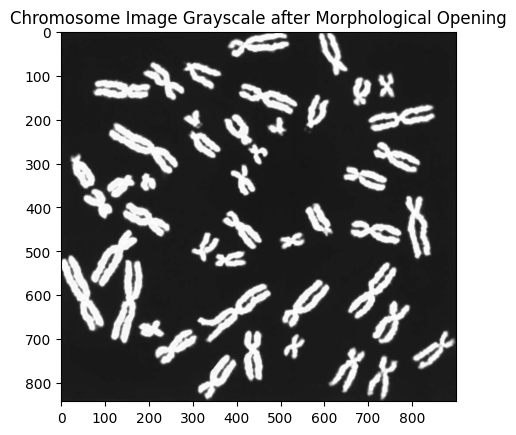

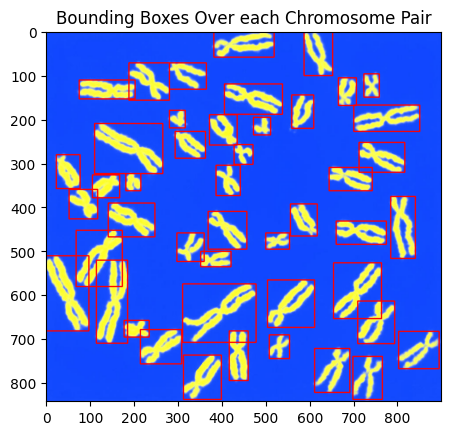

Chromosomes Orginal Dataframe 

    Height  Width    Area   Perimeter  Circularity
0       98     67  2170.5  418.291411     0.155888
1      101     86  3085.5  444.457932     0.196279
2      100     80  2517.0  435.445739     0.166811
3       54     46  1007.5  215.237588     0.273287
4       85     92  2271.5  438.315796     0.148576
5      113     43  3472.5  370.149276     0.318492
6       78     94  2959.5  356.433546     0.292733
7       38     57  1329.5  181.923880     0.504799
8       97     84  2913.0  462.073156     0.171447
9      133    167  5447.0  618.381812     0.179000
10     108    107  3682.0  499.955405     0.185111
11     127    109  3907.5  606.624452     0.133435
12     189     71  5723.0  693.244729     0.149644
13     171     97  6009.0  492.073156     0.311855
14      35     69  1508.0  267.480229     0.264867
15      37     54  1008.0  196.994948     0.326408
16      65     62  1479.5  267.521859     0.259780
17     128    105  4789.5  385.688380     0.404601

In [50]:
#Step 3: Import the above libraries:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Step 4: Read the image Chromosomes.jpg file using cv2.imread() Plot the image using plt.imshow()

chromosomes = cv2.imread('chromosomes.jpg')
plt.title('Original Chromosome Image as read by opencv in BGR format')
plt.imshow(chromosomes)
plt.show()


plt.imshow(cv2.cvtColor(chromosomes, cv2.COLOR_BGR2RGB))
plt.title('Original Chromosome Image')
plt.show()

# Step 5: Convert the image into GRAYSCALE using cv2.cvtColor().

chromosomes_gray = cv2.cvtColor(chromosomes, cv2.COLOR_BGR2GRAY)
plt.imshow(chromosomes_gray, cmap='gray')
plt.title('Chromosome Image Grayscale')
plt.show()

# Step 6: Apply morphological opening for background removal using cv2.getStructuringElement()and cv2.morphologyEx().

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opening = cv2.morphologyEx(chromosomes_gray, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')
plt.title('Chromosome Image Grayscale after Morphological Opening')
plt.show()

# Then threshold the image for binarization using cv2.threshold() and find the contours using cv2.findContours()

ret, chromosomes_thresh1 = cv2.threshold(opening,150, 255, cv2.THRESH_BINARY) # simple threshold using hit and trial
# ret, chromosomes_thresh1 = cv2.threshold(chromosomes_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # using otsu threshold
contours, hierarchy = cv2.findContours(chromosomes_thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


# Step 7: Check if the number of contours is greater than or equal to threshold (5 is recommended) Find the features for each chromosome (Height, Width, Shape, Area, Perimeter and Circularity
data = []
threshold_value = 5
boxed_chromosomes = chromosomes.copy()
for cnt in contours:
    if len(cnt) < threshold_value:
        print("not a valid contour")
    else:
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt, True)
        x, y, w, h = cv2.boundingRect(cnt)
        circularity = (4 * np.pi * area) / (perimeter ** 2)
        boxed_chromosomes = cv2.rectangle(boxed_chromosomes, (x, y), (x+w, y+h), (0, 0, 255), 2)
        data.append([h, w, area, perimeter, circularity])

# Step 8: Draw a bounding box for each chromosome using cv2.Rectangle() and display it over the chromosomes.

plt.imshow(cv2.cvtColor(boxed_chromosomes, cv2.COLOR_BGR2RGB))
plt.title('Bounding Boxes Over each Chromosome Pair')
plt.show()

df = pd.DataFrame(data, columns=['Height', 'Width', 'Area', 'Perimeter', 'Circularity'])
print('Chromosomes Orginal Dataframe \n')
print(df)

#Step 10: Standardize and Normalize the data:

# standardized_df= (df - df.mean()) / df.std()
# print('\n \n Chromosomes standardized Features Dataframe \n')
# print(standardized_df)

# normalized_df = (df - df.min()) / (df.max() -df.min())
# print('\n \n Chromosomes Normalized Features Dataframe \n')
# print(normalized_df)

scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(df), columns=['Height', 'Width', 'Area', 'Perimeter', 'Circularity'])
print('\n \n Chromosomes standardized Features Dataframe \n')
print(standardized_df)

minmax = MinMaxScaler()
normalized_df = pd.DataFrame(minmax.fit_transform(df), columns=['Height', 'Width', 'Area', 'Perimeter', 'Circularity'])
print('\n \n Chromosomes Normalized Features Dataframe \n')
print(normalized_df)

